In [15]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.datasets.cifar10 import load_data
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
from keras.optimizers import Adam

In [ ]:
# CIFAR10 contiene 10 clases diferentes:
# 0: avión
# 1: automóvil
# 2: pájaro
# 3: gato
# 4: ciervo
# 5: perro
# 6: rana
# 7: caballo
# 8: barco
# 9: camión

In [5]:
(X_train, y_train), (X_test, y_test) = load_data()

print("-"*50)
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("-"*50) 
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape) 
print("-"*50)
# 3 canales rojo, verde, azul

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 24s 0us/step
--------------------------------------------------
X_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 1)
--------------------------------------------------
X_test shape: (10000, 32, 32, 3)
y_test shape: (10000, 1)
--------------------------------------------------


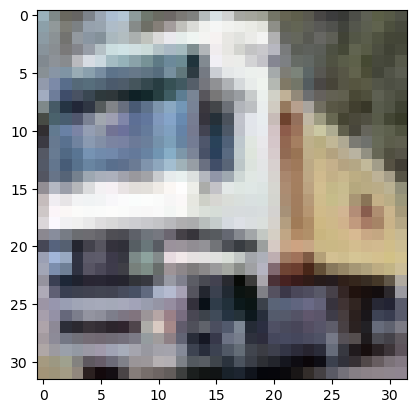

In [7]:
plt.imshow(X_train[1])

In [9]:
X_train = X_train/255.0
X_test = X_test/255.0

In [11]:
# En este ejemplo decidimos hacer one hot encoding
y = np.concatenate([y_train, y_test], axis=0)
y = tf.keras.utils.to_categorical(y, 10)

# Usar los primeros 50000 ejemplos para entrenamiento
y_train = y[:y_train.shape[0]]
# Usar los restantes 10000 ejemplos para prueba
y_test = y[y_train.shape[0]:]

In [13]:
# Tasa de dropout -> 70% de las neuronas serán desactivadas durante el entrenamiento
dp = 0.7 

modelo = Sequential()

modelo.add(Conv2D(
   filters=32,       
   kernel_size=(5,5),   
   padding="same",      
   activation="relu",   
   input_shape=(32,32,3) 
))
modelo.add(MaxPooling2D(pool_size=(2,2)))

modelo.add(Conv2D(
   filters=64,           
   kernel_size=(5,5),    
   padding="same",     
   activation="relu" 
))
modelo.add(MaxPooling2D(pool_size=(2,2))) 
modelo.add(Flatten())
modelo.add(Dense(1024, activation="relu"))

# Dropout para prevenir overfitting
modelo.add(Dropout(dp))  # Desactivar 70% de las neuronas
modelo.add(Dense(10, activation="softmax"))

modelo.summary()

C:\Users\34665\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 32, 32, 32)          │           2,432 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 16, 16, 64)          │          51,264 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1024)                │       4,195,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │          10,250 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,259,274 (16.25 MB)

 Trainable params: 4,259,274 (16.25 MB)

 Non-trainable params: 0 (0.00 B)

In [17]:
epochs = 10
batch_size = 128
lr = 0.001 

In [19]:
modelo.compile(
   loss="categorical_crossentropy",  
   optimizer=Adam(learning_rate=lr),
   metrics=["accuracy"]
)

In [22]:
historico = modelo.fit(
   X_train,                   
   y_train,                 
   epochs=epochs,             
   batch_size=batch_size,    
   validation_split=0.2,  
    verbose=0
)

In [ ]:
plt.plot(historico.history["accuracy"], c="b")
plt.plot(historico.history["val_accuracy"], c="r")
plt.title("Historico")          
plt.xlabel("Epochs")            
plt.ylabel("Accuracy")  
plt.legend(["Train", "Validation"])
plt.show()

In [ ]:
# tenemos un problema de sobreajuste

In [ ]:
ACC = model.evaluate(X_test, y_test)
print("Accuracy: ", ACC[1])